<a href="https://colab.research.google.com/github/anhhngocc22/R-python_LogisticRegression/blob/main/222IS2901_QT_Nh%C3%B3m3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/2. R phyton/data.csv',encoding = 'unicode_escape')
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8420 entries, 0 to 10125
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8420 non-null   int64  
 1   Attrition_Flag            8420 non-null   object 
 2   Customer_Age              8420 non-null   int64  
 3   Gender                    8420 non-null   object 
 4   Dependent_count           8420 non-null   int64  
 5   Education_Level           8420 non-null   object 
 6   Marital_Status            8420 non-null   object 
 7   Income_Category           8420 non-null   object 
 8   Card_Category             8420 non-null   object 
 9   Months_on_book            8420 non-null   int64  
 10  Total_Relationship_Count  8420 non-null   int64  
 11  Months_Inactive_12_mon    8420 non-null   int64  
 12  Contacts_Count_12_mon     8420 non-null   int64  
 13  Credit_Limit              8420 non-null   float64
 14  Total_R

In [ ]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.420000e+03,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000
mean,7.394539e+08,46.437886,2.328029,36.007126,3.972565,2.351900,2.463064,5907.405356,1144.630998,4762.774359,0.756810,3459.336936,60.907720,0.709231,0.308069
std,3.698975e+07,8.127258,1.297525,8.082729,1.491261,1.017855,1.111308,5109.461693,817.456979,5137.505602,0.226835,1596.550910,19.984438,0.246150,0.283267
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130782e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2353.750000,0.000000,1073.000000,0.622000,2061.000000,43.000000,0.571000,0.000000
50%,7.179426e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3610.500000,1255.000000,2542.500000,0.730000,3672.000000,65.000000,0.694000,0.233000
75%,7.738952e+08,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,7925.250000,1769.000000,6753.500000,0.857000,4518.000000,77.000000,0.822000,0.557000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,23742.000000,2517.000000,23742.000000,3.397000,8463.000000,113.000000,3.714000,0.999000


In [ ]:
# Kiểm tra dữ liệu thiếu
print("Số lượng giá trị bị thiếu của mỗi cột:\n", data.isnull().sum())

Số lượng giá trị bị thiếu của mỗi cột:
 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [ ]:
# Kiểm tra dữ liệu trùng lặp
print('Số lượng hàng dữ liệu bị trùng là:',data.duplicated().sum())

Số lượng hàng dữ liệu bị trùng là: 0


In [ ]:
# Đếm số hàng dữ liệu trong cột "Attrition_Flag"
counts = data["Attrition_Flag"].value_counts()

# Tính số lượng % trong cột
percentages = [100 * count / data.shape[0] for count in counts]

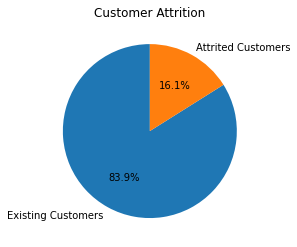

In [ ]:
# Tạo biểu đồ tròn
labels = ["Existing Customers", "Attrited Customers"]
plt.pie(percentages, labels=labels, autopct="%1.1f%%", startangle=90)

# Thêm tiêu đề biểu đồ
plt.title("Customer Attrition")

# Hiển thị biểu đồ
plt.show()

Biểu đồ giúp nhìn thấy tỷ lệ khách hàng rời đi và khách hàng ở lại trong tập dữ liệu. Nó cho thấy rằng bao nhiêu phần trăm khách hàng rời đi và bao nhiêu phần trăm khách hàng ở lại. Biểu đồ này cũng cho thấy rằng tỷ lệ khách hàng ở là cao hơn so với tỷ lệ khách hàng rời đi, vì phần lớn biểu đồ được chiếm bởi phần tương ứng với khách hàng ở lại(83,9%).


In [ ]:
# Đọc dữ liệu từ file csv và chỉ lấy hai cột Credit_Limit và Avg_Open_To_Buy
df = pd.read_csv('/content/drive/MyDrive/2. R phyton/data.csv',encoding = 'unicode_escape', usecols=['Credit_Limit', 'Avg_Open_To_Buy', 'Attrition_Flag'])
df.head(10)

,Attrition_Flag,Credit_Limit,Avg_Open_To_Buy
0,Existing Customer,12691.0,11914.0
1,Existing Customer,8256.0,7392.0
2,Existing Customer,3418.0,3418.0
3,Existing Customer,3313.0,796.0
4,Existing Customer,4716.0,4716.0
5,Existing Customer,4010.0,2763.0
6,Existing Customer,34516.0,32252.0
7,Existing Customer,29081.0,27685.0
8,Existing Customer,22352.0,19835.0
9,Existing Customer,11656.0,9979.0


In [ ]:
# Phân loại khách hàng thành hai nhóm dựa trên cột Attrition_Flag
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
df['Attrition_Flag']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

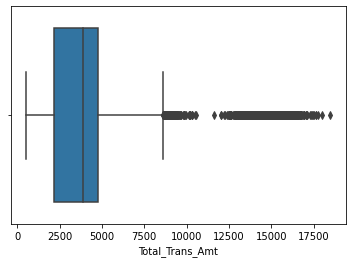

In [ ]:
# vẽ biểu đồ boxplot
sns.boxplot(x=data['Total_Trans_Amt'])

# hiển thị biểu đồ
plt.show()

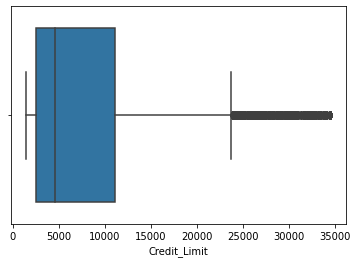

In [ ]:
# vẽ biểu đồ boxplot
sns.boxplot(x=data['Credit_Limit'])

# hiển thị biểu đồ
plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return data

In [ ]:
data = remove_outliers_iqr(data, 'Credit_Limit')

In [ ]:
data = remove_outliers_iqr(data, 'Total_Trans_Amt')

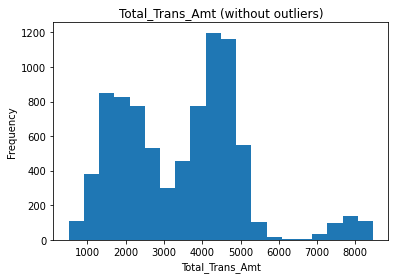

In [ ]:
# Vẽ biểu đồ Total_Trans_Amt
plt.hist(data['Total_Trans_Amt'], bins=20)
plt.title('Total_Trans_Amt (without outliers)')
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Frequency')
plt.show()

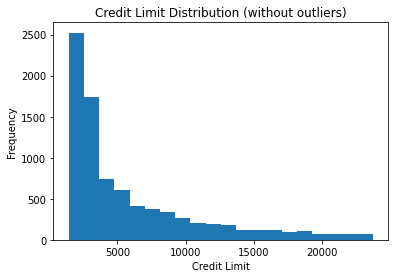

In [ ]:
# Vẽ biểu đồ credit limit
plt.hist(data['Credit_Limit'], bins=20)
plt.title('Credit Limit Distribution (without outliers)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

### **BUILD MODEL** 
*   Import thư viện
*   Chia tệp dữ liệu thành tập huấn luyện và tập kiểm tra




---





In [ ]:
#import thư viên
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['Credit_Limit', 'Total_Trans_Amt']]
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Chuẩn hóa dữ liệu
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Xây dựng mô hình logistic regression trên tập huấn luyện
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## **LogisticRegression()**

In [ ]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.832541567695962
Confusion matrix:
[[   0  423]
 [   0 2103]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Tính precision, recall, f1-score, support cho từng class
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       423
Existing Customer       0.83      1.00      0.91      2103

         accuracy                           0.83      2526
        macro avg       0.42      0.50      0.45      2526
     weighted avg       0.69      0.83      0.76      2526



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
